In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('Cryotherapy.csv')
dataset.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0


In [ ]:
dataset.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0


In [ ]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [ ]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [ ]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

In [ ]:
train,test = train_test_split(dataset, test_size = .2 , random_state = 20)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y='Result_of_Treatment')

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[5 2]
 [2 9]]
0.8181818181818182


In [ ]:
Y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
Y_pred = naive_bayes_gaussian(train, X=X_test, Y='Result_of_Treatment')
print(accuracy_score(Y_test,Y_pred))

0.7777777777777778


In [ ]:
testing = test.iloc[:,:-1]
testing

,sex,age,Time,Number_of_Warts,Type,Area
53,2,40,8.75,6,2,80
2,1,50,8.00,1,3,132
12,2,15,2.00,3,1,4
86,2,20,3.50,6,1,75
87,2,35,8.25,8,3,100
50,2,22,5.00,9,1,70
44,1,17,11.50,2,1,10
23,2,40,9.75,1,2,80
82,2,28,5.00,9,1,100
5,1,41,8.00,2,2,20


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbafc954c90>,
      dtype=object)

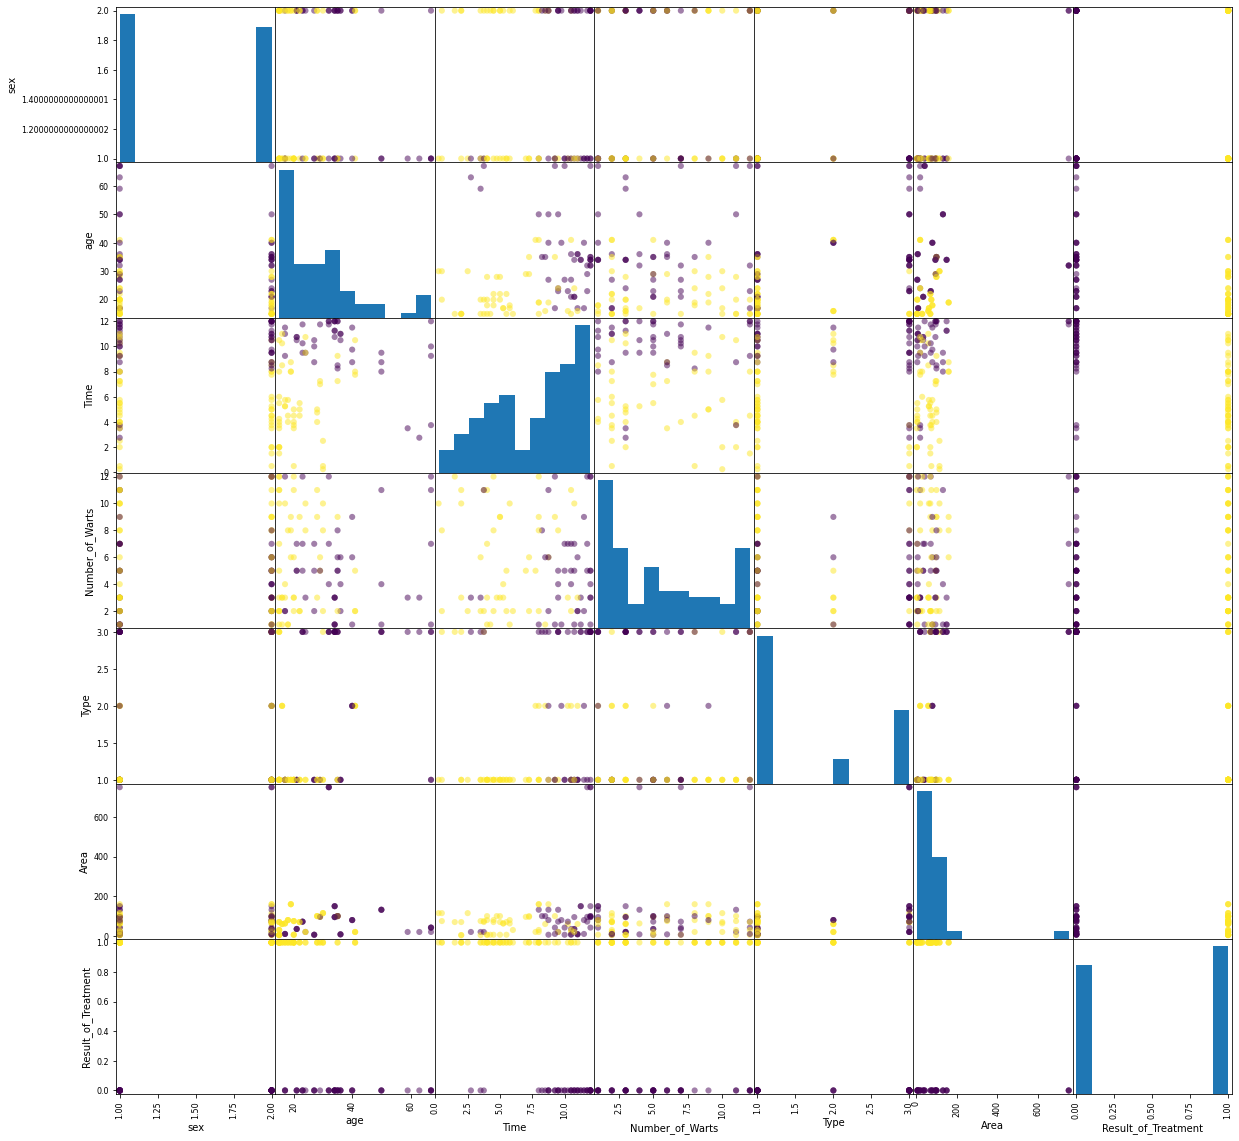

In [ ]:
X = dataset.drop('Result_of_Treatment', axis=1).values
Y = dataset['Result_of_Treatment'].values
pd.plotting.scatter_matrix(dataset, c = Y, figsize=[20,20], s = 150)